# Librerias a usar


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset

In [ ]:
df1=pd.read_csv("/content/BRCA.csv")


## Mostrar Columna del dataset

In [ ]:
print(f"columnas de  data1 : {df1.columns}")

columnas de  data1 : Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status', 'Her Status Bin', 'Patient_Status Bin',
       'Tumour_Stage_Type'],
      dtype='object')


# Descripcion del dataset

In [ ]:
print(f"Informacion de dataset: {df1.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      322 non-null    object 
 16  Her Stat

 ## Valores Nulos

In [ ]:
df1.isnull().sum()

,0
Patient_ID,7
Age,7
Gender,7
Protein1,7
Protein2,7
Protein3,7
Protein4,7
Tumour_Stage,7
Histology,7
ER status,7


# Analisis Individual:
### Para Variables Numericas:

### Obtener resumen de los datos (Media, varianza, cuantiles etc)


In [ ]:
print(f"El resumen del conjunto de datos es: \n {df1.describe()}")

El resumen del conjunto de datos es: 
               Age    Protein1    Protein2    Protein3    Protein4  \
count  334.000000  334.000000  334.000000  334.000000  334.000000   
mean    58.886228   -0.029991    0.946896   -0.090204    0.009819   
std     12.961212    0.563588    0.911637    0.585175    0.629055   
min     29.000000   -2.340900   -0.978730   -1.627400   -2.025500   
25%     49.000000   -0.358888    0.362173   -0.513748   -0.377090   
50%     58.000000    0.006129    0.992805   -0.173180    0.041768   
75%     68.000000    0.343598    1.627900    0.278353    0.425630   
max     90.000000    1.593600    3.402200    2.193400    1.629900   

       Her Status Bin  Patient_Status Bin  
count      334.000000          334.000000  
mean         0.086826            0.763473  
std          0.282003            0.425587  
min          0.000000            0.000000  
25%          0.000000            1.000000  
50%          0.000000            1.000000  
75%          0.000000          

### Graficos para visualizar la distribucion delo0s datos

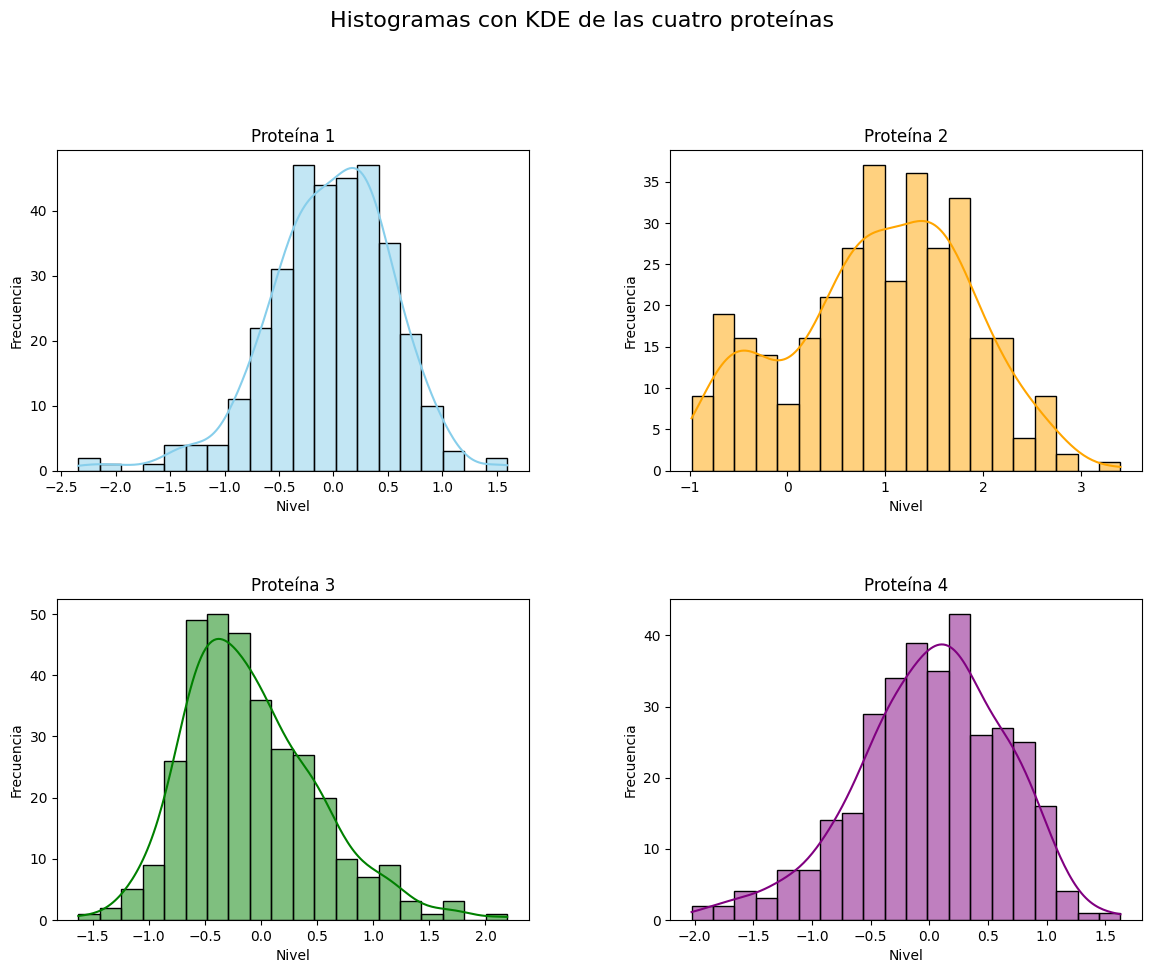

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepara figura con 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Primer histograma: Protein1
sns.histplot(df['Protein1'], ax=axes[0, 0], kde=True, bins=20, color='skyblue')
axes[0, 0].set_title('Proteína 1')
axes[0, 0].set_xlabel('Nivel')
axes[0, 0].set_ylabel('Frecuencia')

# Segundo histograma: Protein2
sns.histplot(df['Protein2'], ax=axes[0, 1], kde=True, bins=20, color='orange')
axes[0, 1].set_title('Proteína 2')
axes[0, 1].set_xlabel('Nivel')
axes[0, 1].set_ylabel('Frecuencia')

# Tercer histograma: Protein3
sns.histplot(df['Protein3'], ax=axes[1, 0], kde=True, bins=20, color='green')
axes[1, 0].set_title('Proteína 3')
axes[1, 0].set_xlabel('Nivel')
axes[1, 0].set_ylabel('Frecuencia')

# Cuarto histograma: Protein4
sns.histplot(df['Protein4'], ax=axes[1, 1], kde=True, bins=20, color='purple')
axes[1, 1].set_title('Proteína 4')
axes[1, 1].set_xlabel('Nivel')
axes[1, 1].set_ylabel('Frecuencia')

plt.suptitle('Histogramas con KDE de las cuatro proteínas', fontsize=16, y=1.02)
plt.show()


### Grafico de caja de las proteinas

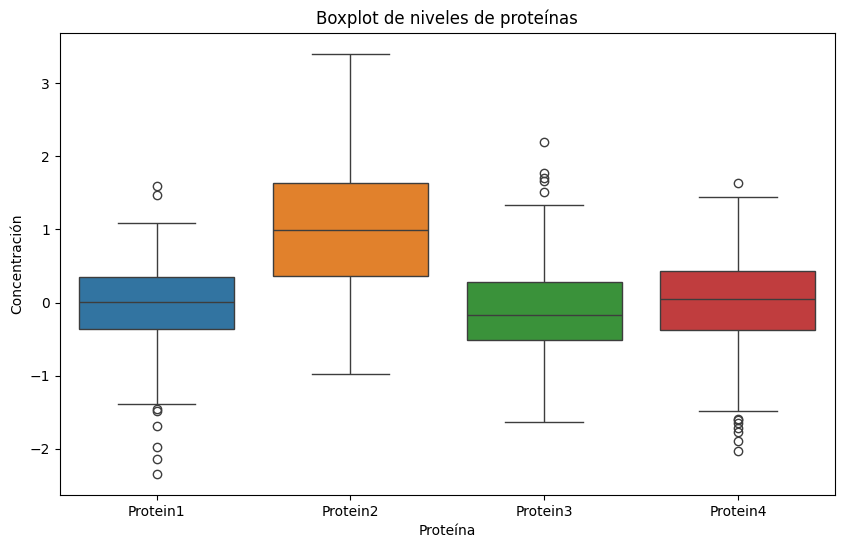

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Extraer solo las columnas de las proteínas
proteins_df = df1[['Protein1', 'Protein2', 'Protein3', 'Protein4']]

# 2) Graficar
plt.figure(figsize=(10, 6))
sns.boxplot(data=proteins_df)
plt.title('Boxplot de niveles de proteínas')
plt.ylabel('Concentración')
plt.xlabel('Proteína')
plt.show()


## Analisis Bivariado:

* scatter plots
 pair plots.

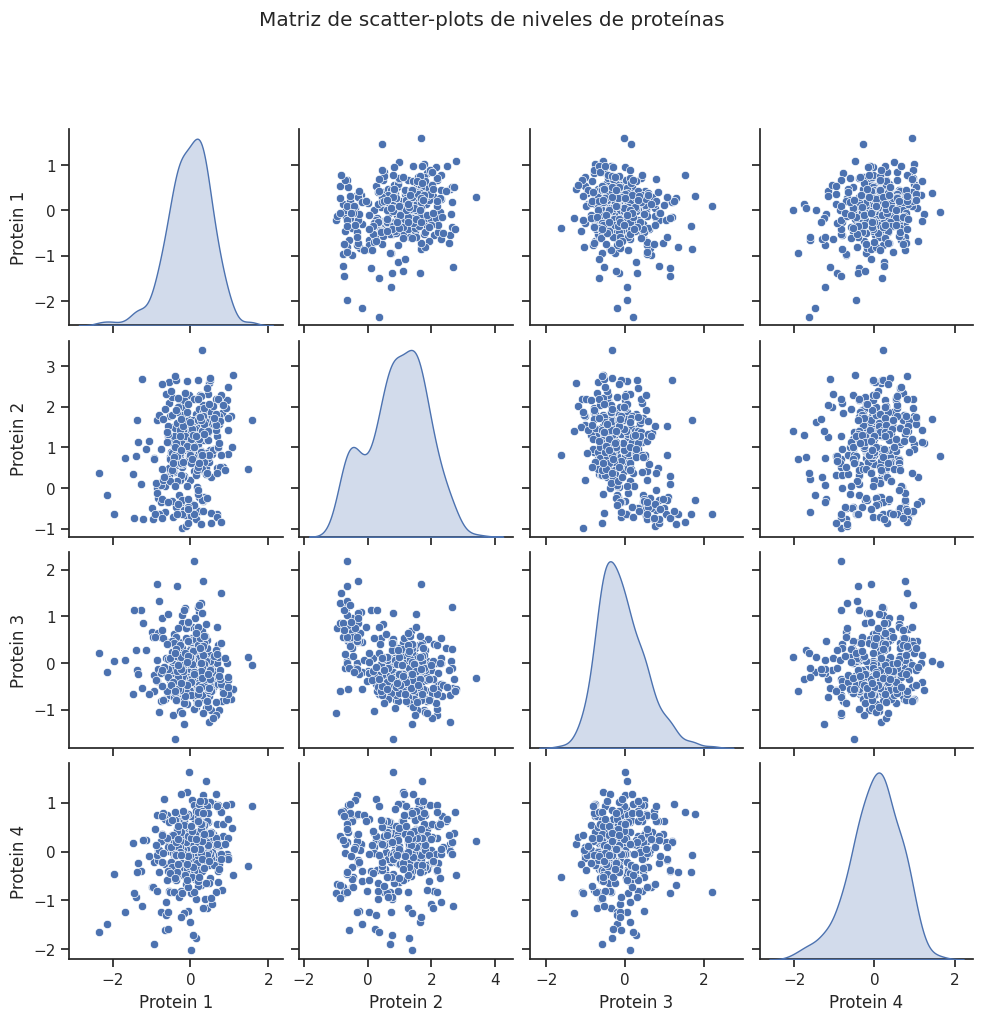

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Creamos un DataFrame solo con las 4 proteínas
proteins_df = df1[['Protein1', 'Protein2', 'Protein3', 'Protein4']].copy()
proteins_df.columns = ['Protein 1', 'Protein 2', 'Protein 3', 'Protein 4']

# 2) Pairplot de los niveles de proteína
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(proteins_df, diag_kind='kde')   # diag_kind='kde' para densidades en diagonal
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Matriz de scatter-plots de niveles de proteínas', y=1.02)
plt.show()


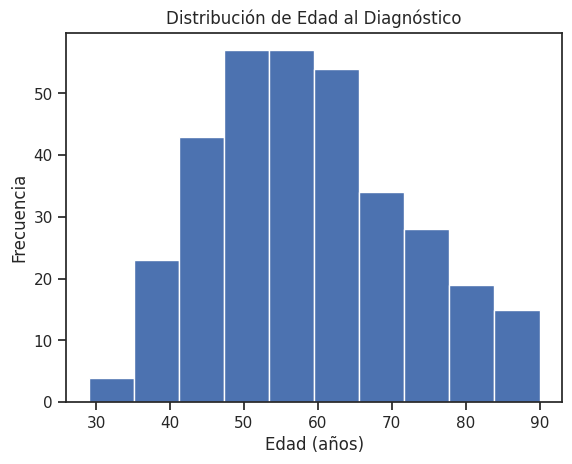

In [ ]:
import matplotlib.pyplot as plt

# Histograma de la edad
plt.hist(df["Age"], bins=10)
plt.title("Distribución de Edad al Diagnóstico")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.show()




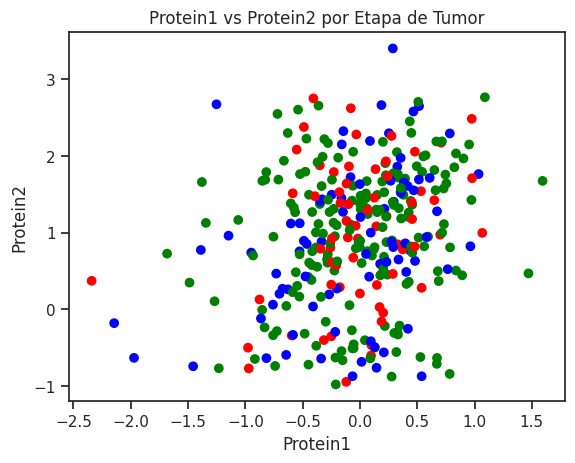

In [ ]:
# Scatter de Protein1 vs Protein2 coloreado por Tumour_Stage
stages = {"I":"red","II":"green","III":"blue"}
colors = df["Tumour_Stage"].map(stages)

plt.scatter(df["Protein1"], df["Protein2"], c=colors)
plt.xlabel("Protein1")
plt.ylabel("Protein2")
plt.title("Protein1 vs Protein2 por Etapa de Tumor")
plt.show()


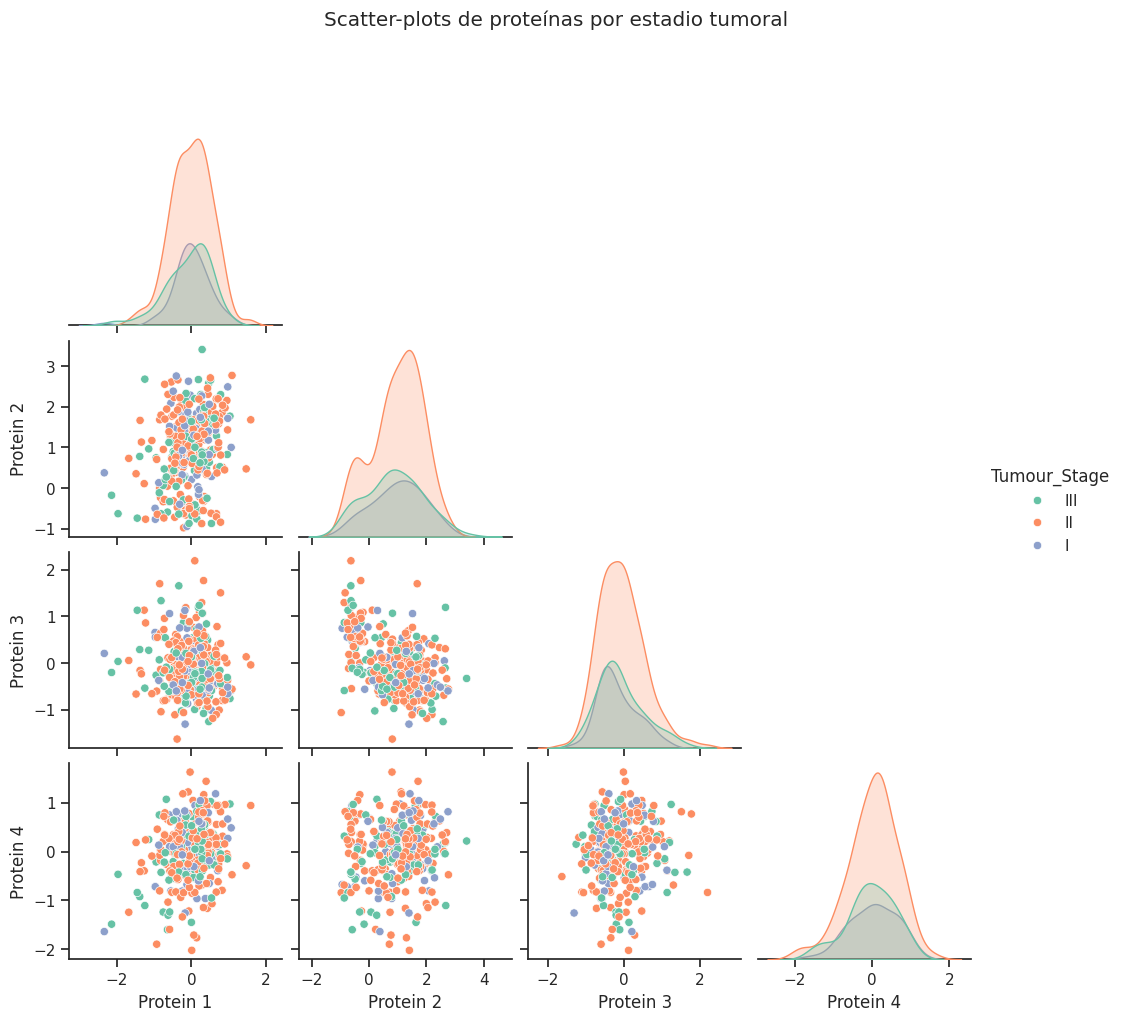

In [ ]:
# 1) Incluimos Tumour_Stage en el DataFrame
proteins_hue = df1[['Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage']].copy()
proteins_hue.columns = ['Protein 1', 'Protein 2', 'Protein 3', 'Protein 4', 'Tumour_Stage']

# 2) Pairplot con hue
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(proteins_hue, hue='Tumour_Stage', diag_kind='kde',
                 palette='Set2', corner=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter-plots de proteínas por estadio tumoral', y=1.02)
plt.show()


## matriz de correlacion Spearman




In [ ]:
import pandas as pd

df = pd.read_csv("/content/BRCA.csv")

# Selecciona solo las columnas de proteínas
proteins = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
proteins_df = df[proteins].dropna().astype(float)

# Calcula la matriz de correlación de Spearman
spearman_matrix = proteins_df.corr(method='spearman')

print("Matriz de correlación de Spearman entre proteínas:")
print(spearman_matrix)


Matriz de correlación de Spearman entre proteínas:
          Protein1  Protein2  Protein3  Protein4
Protein1  1.000000  0.236255 -0.125991  0.227072
Protein2  0.236255  1.000000 -0.352301  0.095852
Protein3 -0.125991 -0.352301  1.000000  0.069621
Protein4  0.227072  0.095852  0.069621  1.000000


Coeficciente de Correlacion
* 1.0: CorrelaicCion Positiva Perfecta
* -1.0: Relacion Ngeativa Perfecta
* 0:no correlaicon

## Metodos No Parametricos:

## Prubea de Mann-Whitney U

###  Hipotesis:


* Hipotesis Nula: No hay diferencia signifcativa entre las distribuciones
* Hipotesis Alternativa:hay diferencia signifcativa entre las distribuciones

In [ ]:
import itertools
from scipy.stats import mannwhitneyu

proteins = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
alpha = 0.05

for p1, p2 in itertools.combinations(proteins, 2):
    group1 = df[p1].dropna().astype(float)
    group2 = df[p2].dropna().astype(float)

    # Mann–Whitney U test (default two-sided asymptotic)
    mw = mannwhitneyu(group1, group2, alternative="two-sided")
    p_clamped = min(1, mw.pvalue)

    print(f"\nMann–Whitney U: {p1} vs {p2}")
    print(f"  U statistic: {mw.statistic:.4f}")
    print(f"  p-value: {p_clamped:.4f}")

    if p_clamped < alpha:
        print("   Rechzamos H₀: diferencia significativa entre las distribuciones.")
    else:
        print("  No rechazamos H₀: no hay diferencia significativa entre las distribuciones.")



Mann–Whitney U: Protein1 vs Protein2
  U statistic: 21469.0000
  p-value: 0.0000
   Rechzamos H₀: diferencia significativa entre las distribuciones.

Mann–Whitney U: Protein1 vs Protein3
  U statistic: 62641.0000
  p-value: 0.0059
   Rechzamos H₀: diferencia significativa entre las distribuciones.

Mann–Whitney U: Protein1 vs Protein4
  U statistic: 53211.0000
  p-value: 0.3034
  No rechazamos H₀: no hay diferencia significativa entre las distribuciones.

Mann–Whitney U: Protein2 vs Protein3
  U statistic: 91072.5000
  p-value: 0.0000
   Rechzamos H₀: diferencia significativa entre las distribuciones.

Mann–Whitney U: Protein2 vs Protein4
  U statistic: 88449.0000
  p-value: 0.0000
   Rechzamos H₀: diferencia significativa entre las distribuciones.

Mann–Whitney U: Protein3 vs Protein4
  U statistic: 47424.5000
  p-value: 0.0008
   Rechzamos H₀: diferencia significativa entre las distribuciones.


### Prueba de Wilcoxon

### Assumption:
* hipotesis Nula: No hay diferencias significativas entre las muestras emprejadas.
* Hipotesis alternativa:ay diferencias significativas entre las muestras emprejadas.

In [ ]:
import itertools
from scipy.stats import wilcoxon

proteins = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
alpha = 0.05

for p1, p2 in itertools.combinations(proteins, 2):
    # Extraemos las dos series y nos aseguramos de alinear índices
    x = df[p1].dropna().astype(float)
    y = df[p2].dropna().astype(float)
    common = x.index.intersection(y.index)
    x, y = x.loc[common], y.loc[common]

    # Prueba de Wilcoxon pareado
    stat, p = wilcoxon(x, y)
    p = min(max(p, 0.0), 1.0)  # clamp por si acaso

    print(f"\nWilcoxon signed-rank: {p1} vs {p2}")
    print(f"  statistic = {stat:.4f}")
    print(f"  p-value   = {p:.4f}")

    if p < alpha:
        print("  Rechazamos H₀: diferencia significativa entre las muestras empareadas.")
    else:
        print("  No rechazamos H₀: no hay diferencia significativa entre las muestras empareadas.")




Wilcoxon signed-rank: Protein1 vs Protein2
  statistic = 4250.0000
  p-value   = 0.0000
  Rechazamos H₀: diferencia significativa entre las muestras empareadas.

Wilcoxon signed-rank: Protein1 vs Protein3
  statistic = 24453.0000
  p-value   = 0.0463
  Rechazamos H₀: diferencia significativa entre las muestras empareadas.

Wilcoxon signed-rank: Protein1 vs Protein4
  statistic = 25677.0000
  p-value   = 0.1937
  No rechazamos H₀: no hay diferencia significativa entre las muestras empareadas.

Wilcoxon signed-rank: Protein2 vs Protein3
  statistic = 7581.0000
  p-value   = 0.0000
  Rechazamos H₀: diferencia significativa entre las muestras empareadas.

Wilcoxon signed-rank: Protein2 vs Protein4
  statistic = 6216.0000
  p-value   = 0.0000
  Rechazamos H₀: diferencia significativa entre las muestras empareadas.

Wilcoxon signed-rank: Protein3 vs Protein4
  statistic = 22923.0000
  p-value   = 0.0042
  Rechazamos H₀: diferencia significativa entre las muestras empareadas.


### Test de Friedman

In [ ]:
import pandas as pd
from scipy.stats import friedmanchisquare

# 1) Carga de datos
df = pd.read_csv("/content/BRCA.csv")

# 2) Extraemos las cuatro series de proteínas y eliminamos filas con NA en alguna
proteins = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
data = df[proteins].dropna().astype(float)

# 3) Prueba de Friedman
#    Cada argumento a friedmanchisquare es una lista de observaciones de un "tratamiento"
stat, p = friedmanchisquare(
    data['Protein1'],
    data['Protein2'],
    data['Protein3'],
    data['Protein4']
)

print("Friedman test across Proteins 1–4:")
print(f"  Statistic = {stat:.4f}")
print(f"  p-value   = {p:.4f}")

if p < 0.05:
    print("   Rechazamos H₀: hay al menos una proteína cuyos niveles difieren de las demás.")
else:
    print("   No rechazamos H₀: no hay evidencia de diferencia en la distribución de niveles entre las proteínas.")


Friedman test across Proteins 1–4:
  Statistic = 249.5856
  p-value   = 0.0000
  👉 Rechazamos H₀: hay al menos una proteína cuyos niveles difieren de las demás.


### Tumores y protes.


⚠️ ER status no es binaria, niveles = ['Positive']

⚠️ PR status no es binaria, niveles = ['Positive']

Mann–Whitney U: Protein1 ~ HER2 status (Negative vs Positive):
  U=4576.0, p=0.7582 → No rechazamos H₀: medianas similares.
Mann–Whitney U: Protein2 ~ HER2 status (Negative vs Positive):
  U=4486.0, p=0.8991 → No rechazamos H₀: medianas similares.
Mann–Whitney U: Protein3 ~ HER2 status (Negative vs Positive):
  U=4260.0, p=0.7444 → No rechazamos H₀: medianas similares.
Mann–Whitney U: Protein4 ~ HER2 status (Negative vs Positive):
  U=4521.0, p=0.8437 → No rechazamos H₀: medianas similares.

⚠️ Surgery_type no es binaria, niveles = ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']

--- Protein1 ~ Tumour_Stage pairwise Mann–Whitney ---
I vs II: U=6047.5, p=1.0000 → sin diferencia
I vs III: U=2674.0, p=0.7455 → sin diferencia
II vs III: U=7976.0, p=0.5851 → sin diferencia

--- Protein2 ~ Tumour_Stage pairwise Mann–Whitney ---
I vs II: U=6145.0, p=0.8488 → sin dif

<ipython-input-32-7a8310d9a945>:56: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grp1, label='Grupo 1', shade=True)
<ipython-input-32-7a8310d9a945>:57: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grp2, label='Grupo 2', shade=True, color='orange')


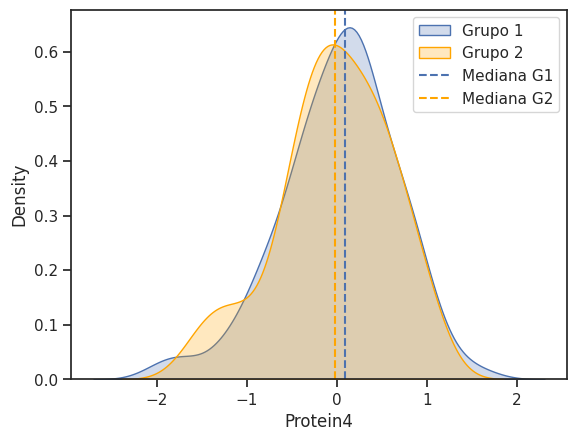

In [ ]:
import itertools
from scipy.stats import mannwhitneyu

alpha = 0.05
proteins = ['Protein1','Protein2','Protein3','Protein4']

# 1) Comparaciones para variables binarias
binaries = ['ER status', 'PR status', 'HER2 status', 'Surgery_type']

for var in binaries:
    levels = df[var].dropna().unique()
    if len(levels) != 2:
        print(f"⚠️ {var} no es binaria, niveles = {levels}\n")
        continue

    g1, g2 = levels
    for prot in proteins:
        grp1 = df.loc[df[var]==g1, prot].dropna().astype(float)
        grp2 = df.loc[df[var]==g2, prot].dropna().astype(float)
        # Solo si hay datos en ambos
        if len(grp1)<1 or len(grp2)<1:
            continue

        stat, p = mannwhitneyu(grp1, grp2, alternative='two-sided')
        p = min(max(p,0.0),1.0)
        print(f"Mann–Whitney U: {prot} ~ {var} ({g1} vs {g2}):")
        print(f"  U={stat:.1f}, p={p:.4f}", end=' → ')
        if p < alpha:
            print(f"Rechazamos H₀: medianas de {prot} difieren entre {g1} y {g2}.")
        else:
            print(f"No rechazamos H₀: medianas similares.")
    print()

# 2) Comparaciones “pairwise” para Tumour_Stage (más de dos niveles)
stages = sorted(df['Tumour_Stage'].dropna().unique())
for prot in proteins:
    print(f"--- {prot} ~ Tumour_Stage pairwise Mann–Whitney ---")
    for s1, s2 in itertools.combinations(stages, 2):
        grp1 = df.loc[df['Tumour_Stage']==s1, prot].dropna().astype(float)
        grp2 = df.loc[df['Tumour_Stage']==s2, prot].dropna().astype(float)
        if len(grp1)<1 or len(grp2)<1:
            continue
        stat, p = mannwhitneyu(grp1, grp2, alternative='two-sided')
        p = min(max(p,0.0),1.0)
        print(f"{s1} vs {s2}: U={stat:.1f}, p={p:.4f}", end=' → ')
        if p < alpha:
            print("medianas difieren")
        else:
            print("sin diferencia")
    print()

    import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que grp1 y grp2 son dos Series
sns.kdeplot(grp1, label='Grupo 1', shade=True)
sns.kdeplot(grp2, label='Grupo 2', shade=True, color='orange')
plt.axvline(grp1.median(), ls='--', label='Mediana G1')
plt.axvline(grp2.median(), ls='--', color='orange', label='Mediana G2')
plt.legend()
plt.show()


### Pruebas de comparacion entre variables + Coeficientes de correlacion

<ipython-input-34-65f15eaff031>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/content/BRCA.csv", parse_dates=["Date_of_Surgery"])


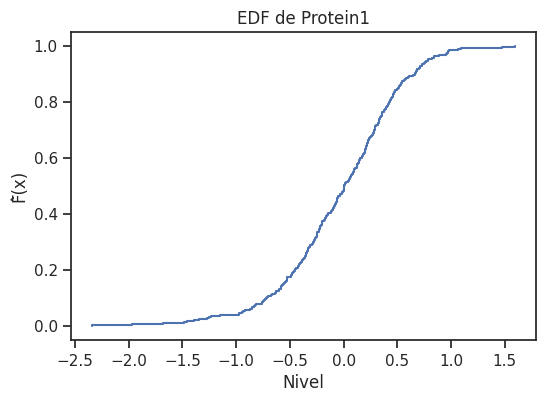

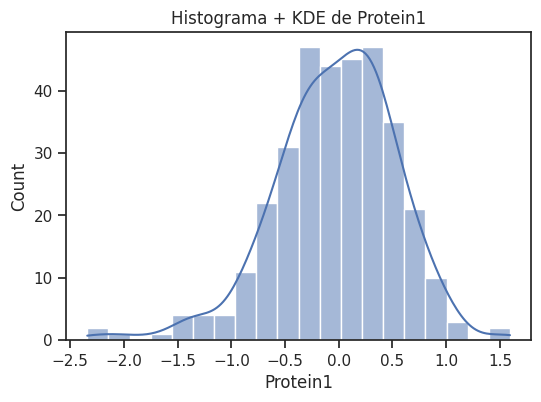

K–S Protein1: statistic=0.0407, p=0.6211 → puede ser normal



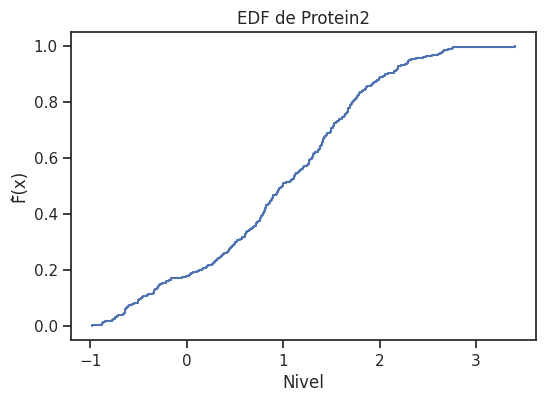

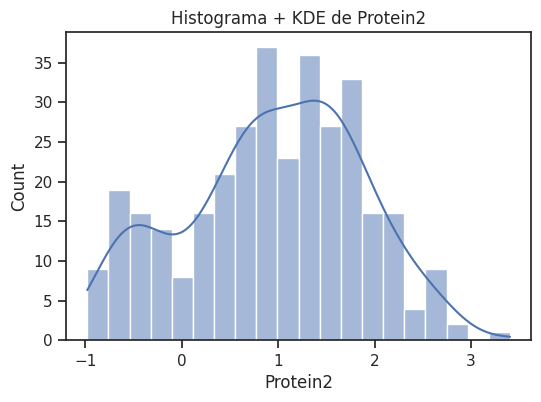

K–S Protein2: statistic=0.0607, p=0.1641 → puede ser normal



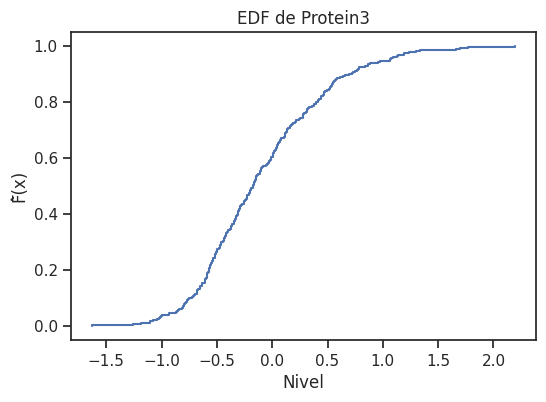

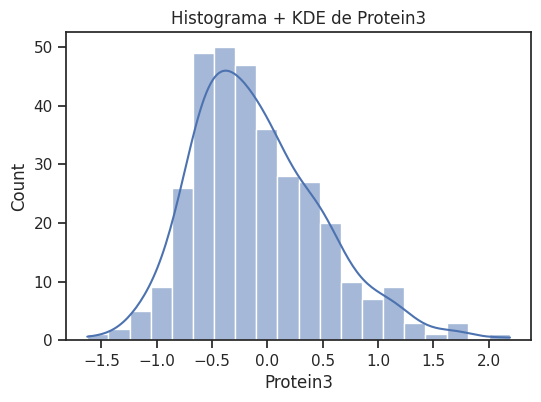

K–S Protein3: statistic=0.0719, p=0.0600 → puede ser normal



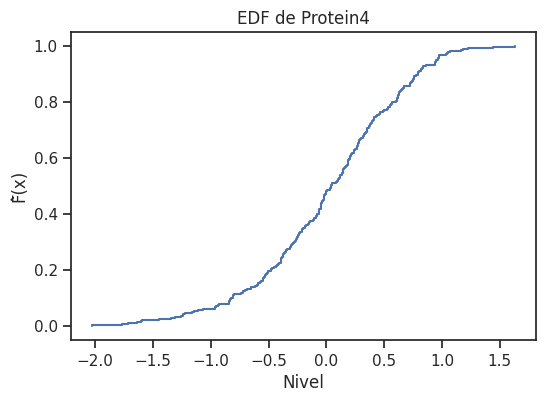

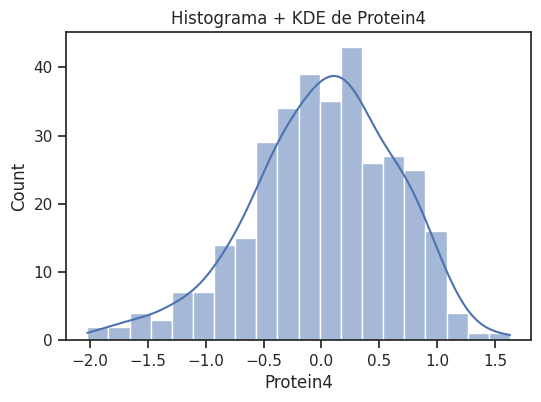

K–S Protein4: statistic=0.0498, p=0.3671 → puede ser normal



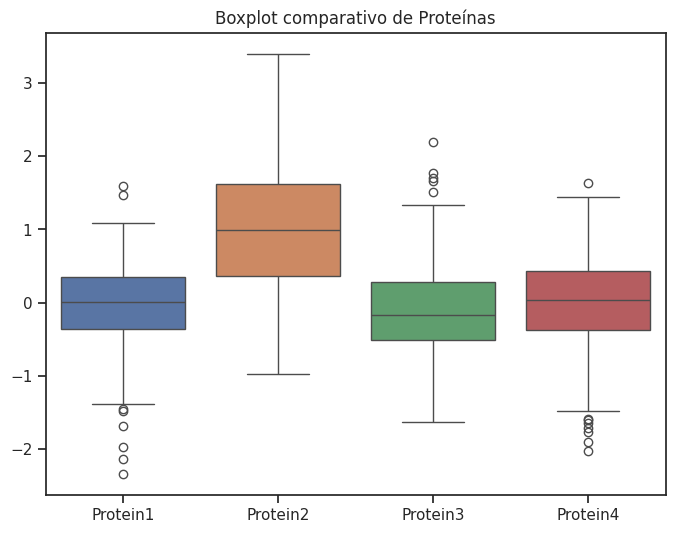

--- Comparación Protein1 vs Protein2 ---
C–vM: H=21.4891, p=0.0000 → distintas
A–D: A=136.2458, p=0.0010 → distintas
MW-U: U=21469.0000, p=0.0000 → medianas dif.
Spearman ρ=0.2363, p=0.0000 → sig.
Kendall τ=0.1626, p=0.0000 → sig.

--- Comparación Protein1 vs Protein3 ---
C–vM: H=1.1813, p=0.0009 → distintas
A–D: A=6.1937, p=0.0013 → distintas
MW-U: U=62641.0000, p=0.0059 → medianas dif.
Spearman ρ=-0.1260, p=0.0213 → sig.
Kendall τ=-0.0826, p=0.0242 → sig.

--- Comparación Protein1 vs Protein4 ---
C–vM: H=0.2329, p=0.2122 → no dif.
A–D: A=0.9704, p=0.1302 → no dif.
MW-U: U=53211.0000, p=0.3034 → medianas sim.
Spearman ρ=0.2271, p=0.0000 → sig.
Kendall τ=0.1510, p=0.0000 → sig.

--- Comparación Protein2 vs Protein3 ---
C–vM: H=21.8502, p=0.0000 → distintas
A–D: A=137.4454, p=0.0010 → distintas
MW-U: U=91072.5000, p=0.0000 → medianas dif.
Spearman ρ=-0.3523, p=0.0000 → sig.
Kendall τ=-0.2428, p=0.0000 → sig.

--- Comparación Protein2 vs Protein4 ---
C–vM: H=18.7855, p=0.0000 → distintas

<ipython-input-34-65f15eaff031>:63: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad = stats.anderson_ksamp([x,y])
<ipython-input-34-65f15eaff031>:63: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad = stats.anderson_ksamp([x,y])
<ipython-input-34-65f15eaff031>:63: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad = stats.anderson_ksamp([x,y])
<ipython-input-34-65f15eaff031>:63: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad = stats.anderson_ksamp([x,y])


In [ ]:
import numpy as np
import pandas as pd
import itertools
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns

# Nivel de significación
alpha = 0.05

# 1) Carga de datos
df = pd.read_csv("/content/BRCA.csv", parse_dates=["Date_of_Surgery"])

# Lista de proteínas
proteins = ['Protein1','Protein2','Protein3','Protein4']

# 2) Análisis univariado para cada proteína
for prot in proteins:
    x = df[prot].dropna().astype(float)

    # 2a) EDF
    ecdf = ECDF(x)
    plt.figure(figsize=(6,4))
    plt.step(ecdf.x, ecdf.y, where='post')
    plt.title(f"EDF de {prot}")
    plt.xlabel("Nivel")
    plt.ylabel("F̂(x)")
    plt.show()

    # 2b) Histograma + KDE
    plt.figure(figsize=(6,4))
    sns.histplot(x, kde=True, bins=20)
    plt.title(f"Histograma + KDE de {prot}")
    plt.show()

    # 2c) Test de normalidad (K–S)
    stat, pval = stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))
    decision = "no normal" if pval<alpha else "puede ser normal"
    print(f"K–S {prot}: statistic={stat:.4f}, p={pval:.4f} → {decision}\n")

# 3) Boxplot comparativo de todas
plt.figure(figsize=(8,6))
sns.boxplot(data=df[proteins].astype(float))
plt.title("Boxplot comparativo de Proteínas")
plt.show()

# 4) Pairwise comparisons
for p1, p2 in itertools.combinations(proteins, 2):
    x = df[p1].dropna().astype(float)
    y = df[p2].dropna().astype(float)
    common_idx = x.index.intersection(y.index)
    x = x.loc[common_idx]
    y = y.loc[common_idx]
    print(f"--- Comparación {p1} vs {p2} ---")

    # a) Cramér–von Mises
    cvm = stats.cramervonmises_2samp(x, y)
    print(f"C–vM: H={cvm.statistic:.4f}, p={cvm.pvalue:.4f} →",
          "distintas" if cvm.pvalue<alpha else "no dif.")

    # b) Anderson–Darling k-samp
    ad = stats.anderson_ksamp([x,y])
    print(f"A–D: A={ad.statistic:.4f}, p={ad.pvalue:.4f} →",
          "distintas" if ad.pvalue<alpha else "no dif.")

    # c) Mann–Whitney U
    u, p_u = stats.mannwhitneyu(x, y, alternative='two-sided')
    p_u = min(max(p_u,0),1)
    print(f"MW-U: U={u:.4f}, p={p_u:.4f} →",
          "medianas dif." if p_u<alpha else "medianas sim.")

    # d) Spearman / Kendall
    rho, p_rho = stats.spearmanr(x, y)
    tau, p_tau = stats.kendalltau(x, y)
    print(f"Spearman ρ={rho:.4f}, p={p_rho:.4f} →",
          "sig." if p_rho<alpha else "no sig.")
    print(f"Kendall τ={tau:.4f}, p={p_tau:.4f} →",
          "sig." if p_tau<alpha else "no sig.")
    print()


### Relacion entre personas vivas y muertas segun el nivel de proteina.

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# 1) Leer datos
df = pd.read_csv("BRCA.csv")

# 2) Asegúrate de que Patient_Status_Bin exista y sea 0/1
#    1 = Alive, 0 = Dead
df = df.dropna(subset=['Patient_Status Bin'])  # descartamos filas sin estado

# 3) Lista de proteínas
proteins = ["Protein1", "Protein2", "Protein3", "Protein4"]

# 4) Armar resultados
results = []
for prot in proteins:
    sub = df[[prot, 'Patient_Status Bin']].dropna()
    alive = sub[sub['Patient_Status Bin'] == 1][prot]
    dead  = sub[sub['Patient_Status Bin'] == 0][prot]
    n_alive, n_dead = len(alive), len(dead)

    # Test solo si ambos grupos tienen al menos 3 valores
    if n_alive >= 3 and n_dead >= 3:
        stat, p = mannwhitneyu(alive, dead, alternative='two-sided')
    else:
        stat, p = None, None

    results.append({
        'Protein': prot,
        'n_alive': n_alive,
        'n_dead':  n_dead,
        'W_stat':  stat,
        'p_value': p
    })

# 5) DataFrame de resultados y ajuste de p-values
res_df = pd.DataFrame(results)
mask    = res_df['p_value'].notna()
res_df.loc[mask, 'adj_p'] = multipletests(res_df.loc[mask, 'p_value'], method='fdr_bh')[1]

# 6) Mostrar resultados
print(res_df)


    Protein  n_alive  n_dead   W_stat   p_value     adj_p
0  Protein1      255      79  10245.5  0.818073  0.818073
1  Protein2      255      79   9213.0  0.252021  0.504042
2  Protein3      255      79   9474.0  0.425209  0.566945
3  Protein4      255      79   9083.5  0.187457  0.504042


### Prueba No parametrica sobre la edad + FDE

In [ ]:
import pandas as pd
from scipy import stats

# 1) Carga de datos
df = pd.read_csv("BRCA.csv")

# 2) Extraer la columna de Edad y descartar valores faltantes
edad = df["Age"].dropna()

# Nivel de significación
alpha = 0.05

# 3a) Prueba de Kolmogorov–Smirnov frente a normal teórica
mu    = edad.mean()
sigma = edad.std(ddof=1)

ks_stat, ks_p = stats.kstest(edad, 'norm', args=(mu, sigma))
ks_decision = "no normal" if ks_p < alpha else "puede ser normal"
print(f"K–S: statistic = {ks_stat:.4f}, p = {ks_p:.4f} → {ks_decision}")


K–S: statistic = 0.0661, p = 0.1035 → puede ser normal


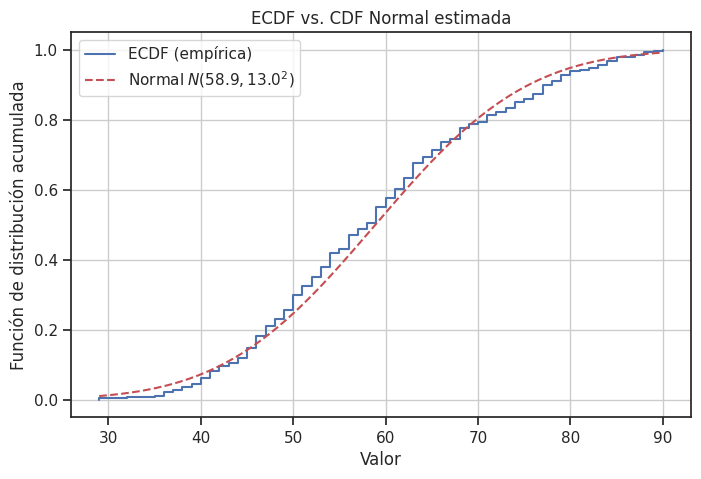

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

# 1) Carga de datos
df = pd.read_csv("BRCA.csv")
x = df["Age"].dropna().values   # o cualquier otra columna numérica

# 2) Calcular ECDF
ecdf = ECDF(x)  # statsmodels.distributions.empirical_distribution.ECDF :contentReference[oaicite:0]{index=0}

# 3) Definir rango para graficar
x_vals = np.linspace(x.min(), x.max(), 200)

# 4) CDF teórica normal con parámetros muestrales
mu, sigma = x.mean(), x.std(ddof=1)
norm_cdf = norm.cdf(x_vals, loc=mu, scale=sigma)  # scipy.stats.norm.cdf :contentReference[oaicite:1]{index=1}

# 5) Plot
plt.figure(figsize=(8,5))
plt.step(ecdf.x, ecdf.y, where="post", label="ECDF (empírica)")  # paso en “post” :contentReference[oaicite:2]{index=2}
plt.plot(x_vals, norm_cdf, 'r--', label=f"Normal$\;N({mu:.1f},{sigma:.1f}^2)$")
plt.xlabel("Valor")
plt.ylabel("Función de distribución acumulada")
plt.title("ECDF vs. CDF Normal estimada")
plt.legend()
plt.grid(True)
plt.show()


### Graficas Funcion de distribucion Empirica de cada proteina

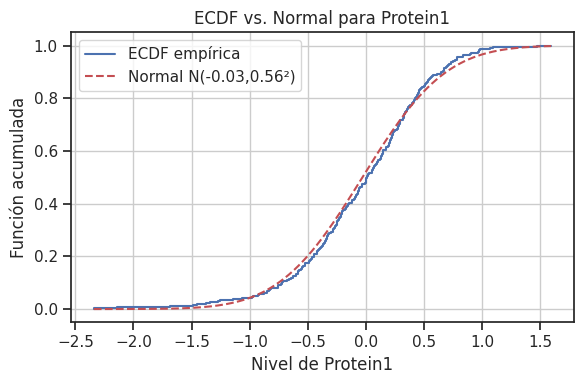

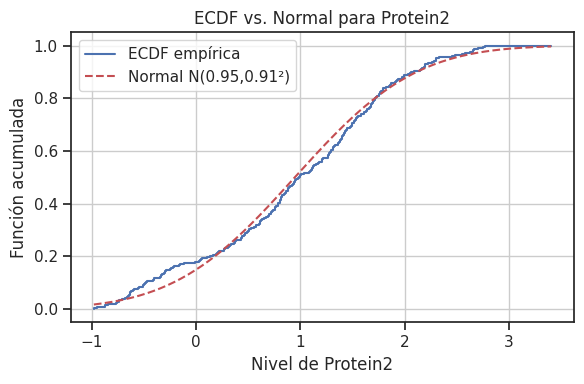

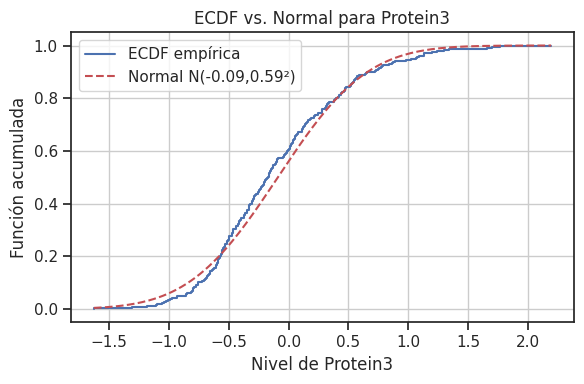

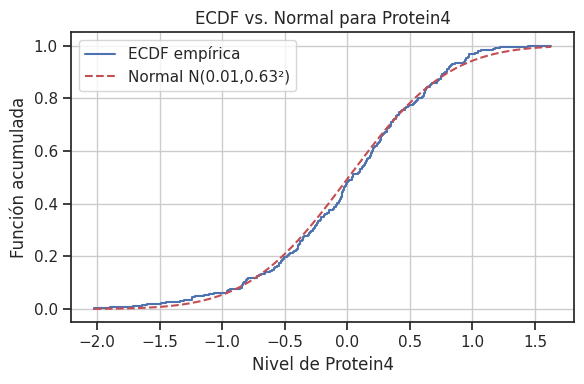

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

# 1) Carga de datos
df = pd.read_csv("BRCA.csv")

# 2) Lista de proteínas
proteins = ["Protein1", "Protein2", "Protein3", "Protein4"]

# 3) Generar un gráfico por proteína
for prot in proteins:
    x = df[prot].dropna().values

    # ECDF
    ecdf = ECDF(x)

    # Ejes para CDF normal
    x_vals = np.linspace(x.min(), x.max(), 200)
    mu, sigma = x.mean(), x.std(ddof=1)
    norm_cdf = norm.cdf(x_vals, loc=mu, scale=sigma)

    # Plot
    plt.figure(figsize=(6,4))
    plt.step(ecdf.x, ecdf.y, where="post", label="ECDF empírica")
    plt.plot(x_vals, norm_cdf, 'r--',
             label=f"Normal N({mu:.2f},{sigma:.2f}²)")
    plt.title(f"ECDF vs. Normal para {prot}")
    plt.xlabel(f"Nivel de {prot}")
    plt.ylabel("Función acumulada")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




### Pruebas de bondad y ajuste para cada proteina y la edad


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

# 1) Carga de datos
df = pd.read_csv("BRCA.csv")

# 2) Variables a testear
variables = ["Age", "Protein1", "Protein2", "Protein3", "Protein4"]

# 3) Función helper para chi-cuadrado con normalización de frecuencias esperadas
def chi2_gof(x, bins='auto'):
    """
    Test de bondad de ajuste chi-cuadrado frente a N(mu, sigma^2).
    Agrupa en 'bins' clases, estima mu y sigma de la muestra,
    calcula frecuencias esperadas y normaliza para que sumen igual
    que las observadas.
    """
    mu, sigma = x.mean(), x.std(ddof=1)
    counts, bin_edges = np.histogram(x, bins=bins)
    # probabilidades teóricas en cada intervalo
    cdf = lambda v: stats.norm.cdf(v, loc=mu, scale=sigma)
    probs = np.diff(cdf(bin_edges))
    expected = probs * len(x)
    # normalizar para eliminar discrepancias numéricas
    expected *= counts.sum() / expected.sum()
    # algunos bins pueden tener expectativa muy baja: combinarlos o saltar
    if np.any(expected < 1):
        raise ValueError("Frecuencias esperadas < 1 en alguna clase; aumenta recogido de bins o filtra extremos.")
    # ddof=2 porque estimamos mu y sigma
    chi2, p = stats.chisquare(counts, f_exp=expected, ddof=2)
    return chi2, p

# 4) Nivel de significación
alpha = 0.05

# 5) Loop sobre todas las variables
for var in variables:
    x = df[var].dropna().values
    n = len(x)
    if n < 5:
        print(f"\n==== Variable: {var} (n={n}) ====")
        print("  Muestra demasiado pequeña para pruebas de bondad de ajuste.\n")
        continue

    mu, sigma = x.mean(), x.std(ddof=1)
    print(f"\n==== Variable: {var} (n={n}, μ={mu:.2f}, σ={sigma:.2f}) ====")

    # a) Chi-cuadrado
    try:
        chi2_stat, chi2_p = chi2_gof(x, bins='sqrt')
        chi2_dec = "no normal" if chi2_p < alpha else "puede ser normal"
        print(f"Chi-cuadrado     : stat={chi2_stat:.4f}, p={chi2_p:.4f} → {chi2_dec}")
    except Exception as e:
        print(f"Chi-cuadrado     : ERROR ({e})")

    # b) Kolmogorov–Smirnov
    ks_stat, ks_p = stats.kstest(x, 'norm', args=(mu, sigma))
    ks_dec = "no normal" if ks_p < alpha else "puede ser normal"
    print(f"Kolmogorov–Smirnov: stat={ks_stat:.4f}, p={ks_p:.4f} → {ks_dec}")

    # c) Lilliefors (KS con parámetros estimados)
    lf_stat, lf_p = lilliefors(x, dist='norm')
    lf_dec = "no normal" if lf_p < alpha else "puede ser normal"
    print(f"Lilliefors       : stat={lf_stat:.4f}, p={lf_p:.4f} → {lf_dec}")

    # d) Anderson–Darling
    ad_res = stats.anderson(x, dist='norm')
    ad_stat = ad_res.statistic
    # aproximar p-valor por comparación con tabla integrada
    ad_p = None
    for sl, cv in zip(ad_res.significance_level, ad_res.critical_values):
        if ad_stat < cv:
            ad_p = sl / 100
            break
    ad_p_str = f"{ad_p:.2f}" if ad_p is not None else "<0.15"
    ad_dec = "no normal" if (ad_p is not None and ad_p < alpha) else "puede ser normal"
    print(f"Anderson–Darling : stat={ad_stat:.4f}, p≈{ad_p_str} → {ad_dec}")

    # e) Cramér–von Mises
    cvm_res = stats.cramervonmises(x, 'norm', args=(mu, sigma))
    cvm_stat, cvm_p = cvm_res.statistic, cvm_res.pvalue
    cvm_dec = "no normal" if cvm_p < alpha else "puede ser normal"
    print(f"Cramér–von Mises : stat={cvm_stat:.4f}, p={cvm_p:.4f} → {cvm_dec}")

print("\nTodas las pruebas concluídas.")




==== Variable: Age (n=334, μ=58.89, σ=12.96) ====
Chi-cuadrado     : stat=39.1611, p=0.0010 → no normal
Kolmogorov–Smirnov: stat=0.0661, p=0.1035 → puede ser normal
Lilliefors       : stat=0.0661, p=0.0026 → no normal
Anderson–Darling : stat=1.7506, p≈<0.15 → puede ser normal
Cramér–von Mises : stat=0.2669, p=0.1681 → puede ser normal

==== Variable: Protein1 (n=334, μ=-0.03, σ=0.56) ====
Chi-cuadrado     : ERROR (Frecuencias esperadas < 1 en alguna clase; aumenta recogido de bins o filtra extremos.)
Kolmogorov–Smirnov: stat=0.0407, p=0.6211 → puede ser normal
Lilliefors       : stat=0.0407, p=0.2467 → puede ser normal
Anderson–Darling : stat=1.2190, p≈<0.15 → puede ser normal
Cramér–von Mises : stat=0.1672, p=0.3412 → puede ser normal

==== Variable: Protein2 (n=334, μ=0.95, σ=0.91) ====
Chi-cuadrado     : stat=48.2182, p=0.0000 → no normal
Kolmogorov–Smirnov: stat=0.0607, p=0.1641 → puede ser normal
Lilliefors       : stat=0.0607, p=0.0082 → no normal
Anderson–Darling : stat=1.9513,